# Lab 12-4: RNN with long sequences: Stacked RNN + Softmax layer

### Stacked RNN

In [12]:
import tensorflow as tf
import numpy as np

In [19]:
tf.reset_default_graph()

In [20]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [21]:
char_set = list(set(sentence))
char_dic = {w:i for i,w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
seq_length = 10
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - seq_length):
    x_str = sentence[i:i+seq_length]
    y_str = sentence[i+1:i+1+seq_length]
    print(i, x_str,'->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    dataX.append(x)
    dataY.append(y)
    
batch_size = len(dataX)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [22]:
X = tf.placeholder(tf.int32, [None, seq_length])
Y = tf.placeholder(tf.int32, [None, seq_length])

x_one_hot = tf.one_hot(X, num_classes)

cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
cell = tf.contrib.rnn.MultiRNNCell([cell]*2, state_is_tuple = True)

outputs, _states = tf.nn.dynamic_rnn(cell, x_one_hot, dtype = tf.float32)

### Softmax

In [23]:
x_for_softmax = tf.reshape(outputs, [-1, hidden_size])

softmax_w = tf.get_variable('softmax_w', [hidden_size, num_classes],
                           initializer = tf.contrib.layers.xavier_initializer())
softmax_b = tf.get_variable('softmax_b', [num_classes])

outputs = tf.matmul(x_for_softmax, softmax_w) + softmax_b
outputs = tf.reshape(outputs, [batch_size, seq_length, num_classes])

### Loss

In [24]:
#All weights are 1 (equla weight)
weights = tf.ones([batch_size, seq_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)
mean_loss = tf.reduce_mean(sequence_loss)

train_op = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(mean_loss)

### Trainig and print results

In [34]:
config = tf.ConfigProto(device_count = {'GPU':0})

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(500):
        _, l, results = sess.run([train_op, mean_loss, outputs],
                                feed_dict = {X:dataX, Y:dataY})
        
        #print the last char of each result to check it works
        for j, result in enumerate(results):
            index = np.argmax(result, axis = 1)
            if j is 0:
                print(''.join([char_set[t] for t in index]),end = '')
            else:
                print(char_set[index[-1]], end = '')
        print('\n')
        

sssssssssssssssssssssssssssssssssssssssswwwwsssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

                                                                                                                                        s                                          

                                                                                                                                                                                   

                                                                                                                                                                                   

                                                                                                                                                                                   

                                                                                               

p you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them ta long for the endless immensity of the saa.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

f you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

f you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

f you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

t you want to build a ship, don't drum up people together to collect wood and don't assign them

# Lab12-5: Dynamic RNN
- Different sequence length
- sequence_length를 array로 만들어 tf.nn.dynamic_rnn에 넣어주기만 하면 된다.

예시) 3 batches 'hello', 'eolll', 'lleel'

x_data = np.array([[[...]]], dtype = np.float32)

hidden_size = 2
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)

outputs, _states = tf.nn.dynamic_rnn(cell, x_data, sequence_length = [5,3,4],
                                    dtype = tf.float32)
sess.run(tf.global_variables_initializer())
print(outputs.eval(session = sess))


# Lab 12-6: RNN with time series data (stock)

### Reading data

In [51]:
timesteps = seq_length = 7  #7일치 data를 예측에 사용
data_dim = 5  #하루에 담고 있는 데이터의 종류가 5개 (open, high, low, close, volume)
output_dim = 1  #최종 output은 close 하나
hidden_dim = 10

xy = np.loadtxt('data-02-stock_daily.csv', delimiter = ',')
xy = xy[::-1]  #reverse order (chronically ordered)

def MinMaxScaler(data):
    numerator = data - np.min(data, 0) #column별로 가장 작은 값을 data에서 빼줌 (min을 0으로!)
    denominator = np.max(data,0) - np.min(data,0) #컬럼별로 가장 큰 값에서 가장 작은 값 빼준 값
    #noise term prevents the zero division
    return numerator / (denominator + 1e-7)    
    
    
xy = MinMaxScaler(xy)
x = xy  #전체 data가 최소 한 번은 x값이 된다. (time series)
y = xy[:,[-1]]  #Close as label  

In [49]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length] #Next close price
    print(_x, '->', _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]] -> [0.11590123]
[[0.12975885 0.12514245 0.12564359 0.17597921 0.12036025]
 [0.10886472 0.11226863 0.12115391 0.17885632 0.11584288]
 [0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]
 [0.1277481  0.13568087 0.13324944 0.12753428 0.1361567 ]
 [0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]] -> [0.1376721]
[[0.10886472 0.11226863 0.12115391 0.17885632 0.11584288]
 [0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]
 [0.1277481  0.13568087 0.13324944 0.12753428 0.1361567 ]
 [0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]] -> [0.1376431]
[[0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]
 [0.1277481  0.13568087

 [0.66723759 0.65907621 0.6728169  0.08317648 0.65408375]] -> [0.66565422]
[[0.56920683 0.59456226 0.59135873 0.12584028 0.59809726]
 [0.59281125 0.58450369 0.58879115 0.11618715 0.59107333]
 [0.59694924 0.60621069 0.61291164 0.14047683 0.6210048 ]
 [0.62186485 0.63742707 0.64461757 0.09894237 0.64857557]
 [0.65412409 0.65601238 0.67005857 0.11911804 0.66475074]
 [0.66723759 0.65907621 0.6728169  0.08317648 0.65408375]
 [0.66129287 0.65390244 0.67627962 0.08445819 0.66565422]] -> [0.66244821]
[[0.59281125 0.58450369 0.58879115 0.11618715 0.59107333]
 [0.59694924 0.60621069 0.61291164 0.14047683 0.6210048 ]
 [0.62186485 0.63742707 0.64461757 0.09894237 0.64857557]
 [0.65412409 0.65601238 0.67005857 0.11911804 0.66475074]
 [0.66723759 0.65907621 0.6728169  0.08317648 0.65408375]
 [0.66129287 0.65390244 0.67627962 0.08445819 0.66565422]
 [0.67338632 0.66410549 0.67928725 0.11395536 0.66244821]] -> [0.70304668]
[[0.59694924 0.60621069 0.61291164 0.14047683 0.6210048 ]
 [0.62186485 0.637427

### Training and test datasets

In [50]:
#split to train and testing
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

#input placeholders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

### LSTM and Loss

In [52]:
cell= tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, state_is_tuple = True )
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

#we use the last cell's output
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1], output_dim, activation_fn = None )

In [53]:
#cost/loss
loss = tf.reduce_sum(tf.square(Y_pred-Y))

#optimizer 
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

### Training and Results

In [54]:
config = tf.ConfigProto(device_count = {'GPU':0})

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        _, l = sess.run([train, loss], feed_dict = {X:trainX, Y: trainY})
        if i % 20 == 0:
            print(i, l)
        
    testPredict = sess.run(Y_pred, feed_dict = {X: testX})

0 297.6181
20 5.474916
40 1.8692654
60 1.0339465
80 0.98296833
100 0.95225364
120 0.927038
140 0.9016294
160 0.87496394
180 0.84700304
200 0.8180647
220 0.7888182
240 0.7601938
260 0.7331394
280 0.7083307
300 0.6860403
320 0.6662023
340 0.64856476
360 0.6328165
380 0.6186563
400 0.6058219
420 0.59409595
440 0.58330154
460 0.5732972
480 0.56397086
500 0.5552347
520 0.5470191
540 0.5392717
560 0.53195226
580 0.52502936
600 0.51847935
620 0.51228315
640 0.5064243
660 0.50088817
680 0.49566042
700 0.49072734
720 0.48607507
740 0.4816896
760 0.47755718
780 0.47366446
800 0.4699977
820 0.46654376
840 0.46328923
860 0.46022096
880 0.4573259
900 0.45459118
920 0.45200408
940 0.44955236
960 0.44722396
980 0.4450076


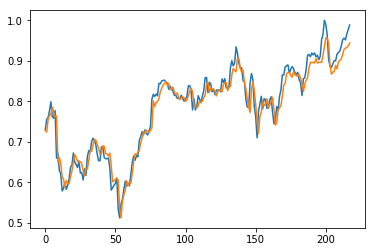

In [56]:
import matplotlib.pyplot as plt

plt.plot(testY)
plt.plot(testPredict)
plt.show()